Setup

In [1]:
from LNL import define_save_LNL_model
from Full_model import define_model,train_and_save
from sparse_model_v2 import define_model_sparse,train_and_save_sparse
import os
import time
from image_receptive_field import visualize_img_recep
from compare_imgs import show_img_compare
from model_summary import show_generator,visualize_weights
from plot_error import show_error,comp_error

cwd = os.getcwd()
LNL_model_path = cwd+'/data/LNL_model.pth'

Define the LNL section of the model and saves it for later use

In [2]:
# whether to use curated resolvable gaussian radius of ERF
FHWM=False
# if not define current spread arbitrarily here
current_spread = 0.1
# define the electrode grid
elec_side_dim = 12
activ_spread= 0.01
#define neuron grid
neu_side_dim = 16

# define the LNL layer with gaussian electrical receptive field
W_d = define_save_LNL_model(LNL_model_path,elec_side_dim, neu_side_dim, activ_spread, current_spread,FHWM)


Define the Full model to be trained

In [3]:
# define the full model to be trained
drop_rate = 0.2
# options for activation functions are "linear", "2sig" and "ReLU"
activ_funcs_options = ["linear", "2sig","ReLU"]
activ_func1 = activ_funcs_options[0]
activ_func2 = activ_funcs_options[1]
# shift and magnitude defines the 2sig function shape
shift = 9
magnitude = 0.5

AutoEncoder = define_model(elec_side_dim,neu_side_dim, LNL_model_path, drop_rate, activ_func1 ,activ_func2,shift,magnitude)
#AutoEncoder = define_model_sparse(elec_side_dim,neu_side_dim, LNL_model_path, drop_rate, activ_func1,activ_func2,shift,magnitude)

In [4]:
model_title = "0.1s_2sig_16elec24neu" 

Train the model and save the model for result demo
Default Model:

In [5]:
# n_epochs = 40
# mult_lr = False
# start_time = time.time()
# train_and_save(n_epochs,AutoEncoder,model_title,mult_lr)
# end_time = time.time()
# execution_time = end_time - start_time
# print(f"Execution time: {execution_time} seconds")

Sparse Model

In [6]:
# n_epochs = 200
# mult_lr = False
# start_time = time.time()
# _lambda = 0.000005
# train_and_save_sparse(n_epochs,AutoEncoder,model_title,_lambda,mult_lr = False)
# end_time = time.time()
# execution_time = end_time - start_time
# print(f"Execution time: {execution_time} seconds")

Result Demo

In [7]:
# set the file directory to show
cwd = os.getcwd()
#model_path = cwd+f'/data/240729_data/model_lr = 0.0001_lnr_10elec.pth'

model_path = cwd+f'/data/model_{model_title}_lr = 0.0001.pth'

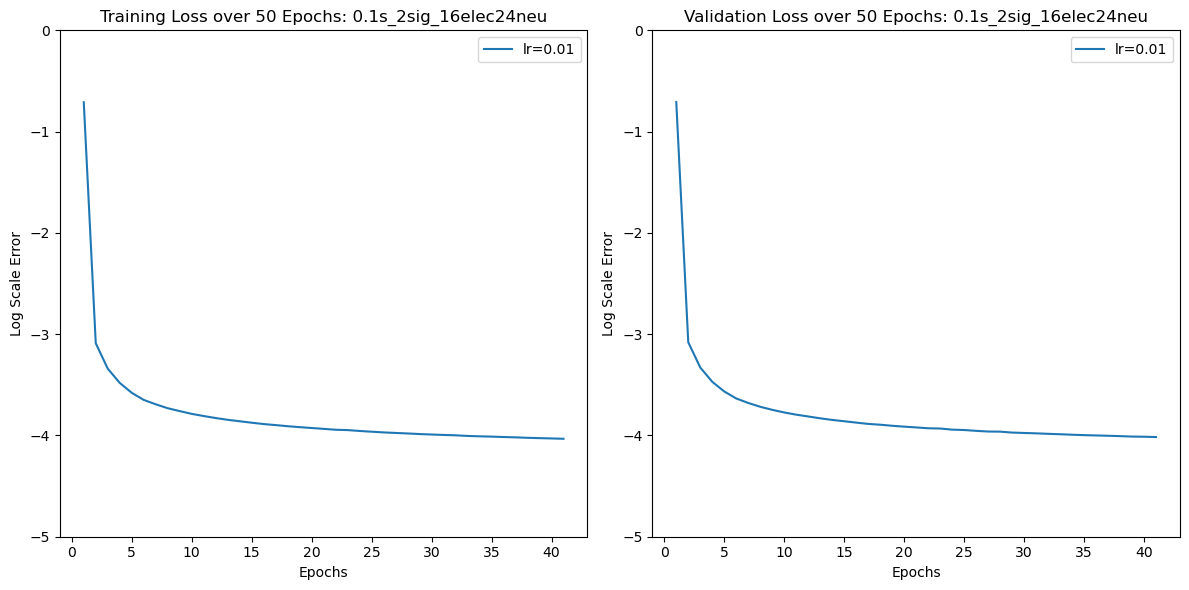

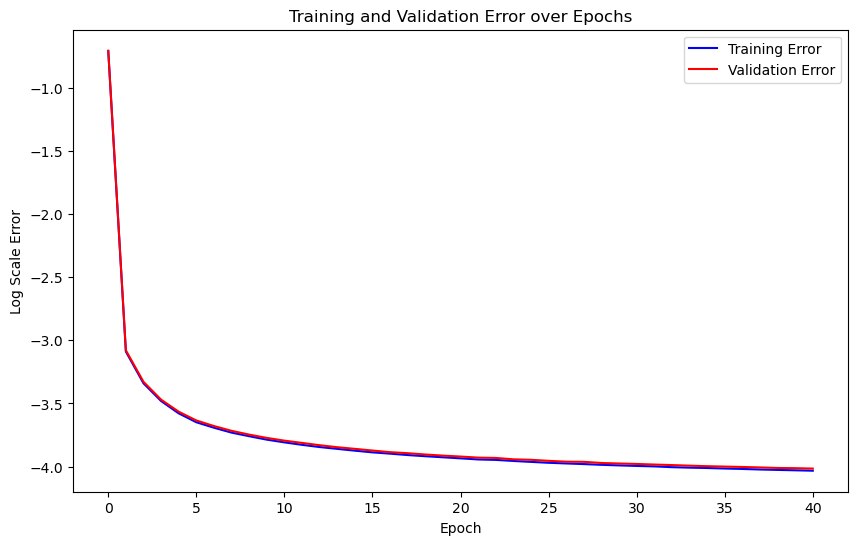

In [8]:
data_path = cwd + f'/data/NN_{model_title}_output.pkl'

show_error(data_path,model_title)
comp_error(data_path,model_title)

Files already downloaded and verified
Files already downloaded and verified


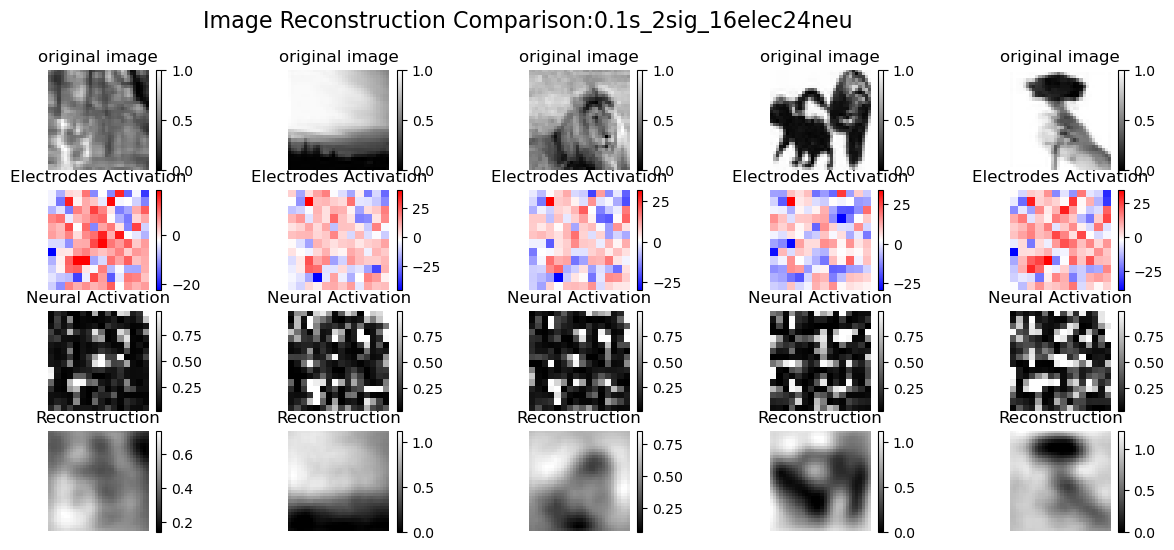

In [9]:
# import math
# import matplotlib.pyplot as plt
# import numpy as np
# import torch
output_test_flat, layer1_flat, layer2_flat = show_img_compare(model_path, AutoEncoder,model_title)
# layer1_flat = layer1_flat.detach().numpy()
# test_lyr2_flat = layer1_flat @ (W_d.transpose())


# sigmoid1 = 1/(1+np.exp(magnitude * (test_lyr2_flat + shift)))
# sigmoid2 = 1/(1+np.exp(-1*magnitude * (test_lyr2_flat - shift)))
# test_lyr2_flat = sigmoid1 + sigmoid2

# test_lyr2_flat = torch.tensor(test_lyr2_flat)



# side_dim = int(math.sqrt(test_lyr2_flat.shape[1]))
# test_lyr2 = test_lyr2_flat.view(test_lyr2_flat.shape[0],side_dim,side_dim)
# test_lyr2_np = test_lyr2.detach().numpy()

# lyr2 = layer2_flat.view(layer2_flat.shape[0],side_dim,side_dim)
# lyr2_np = lyr2.detach().numpy()

# # Create a figure with 2 subplots side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# # Plotting on the first subplot
# img1 = ax1.imshow(test_lyr2_np[4],cmap='gray')

# # Plotting on the second subplot
# img2 = ax2.imshow(lyr2_np[4],cmap='gray')
# fig.colorbar(img1, ax=ax1, fraction=0.046, pad=0.04) 
# fig.colorbar(img2, ax=ax2, fraction=0.046, pad=0.04) 
# # Adjust the space between the plots
# plt.tight_layout()

# # Display the plots
# plt.show()

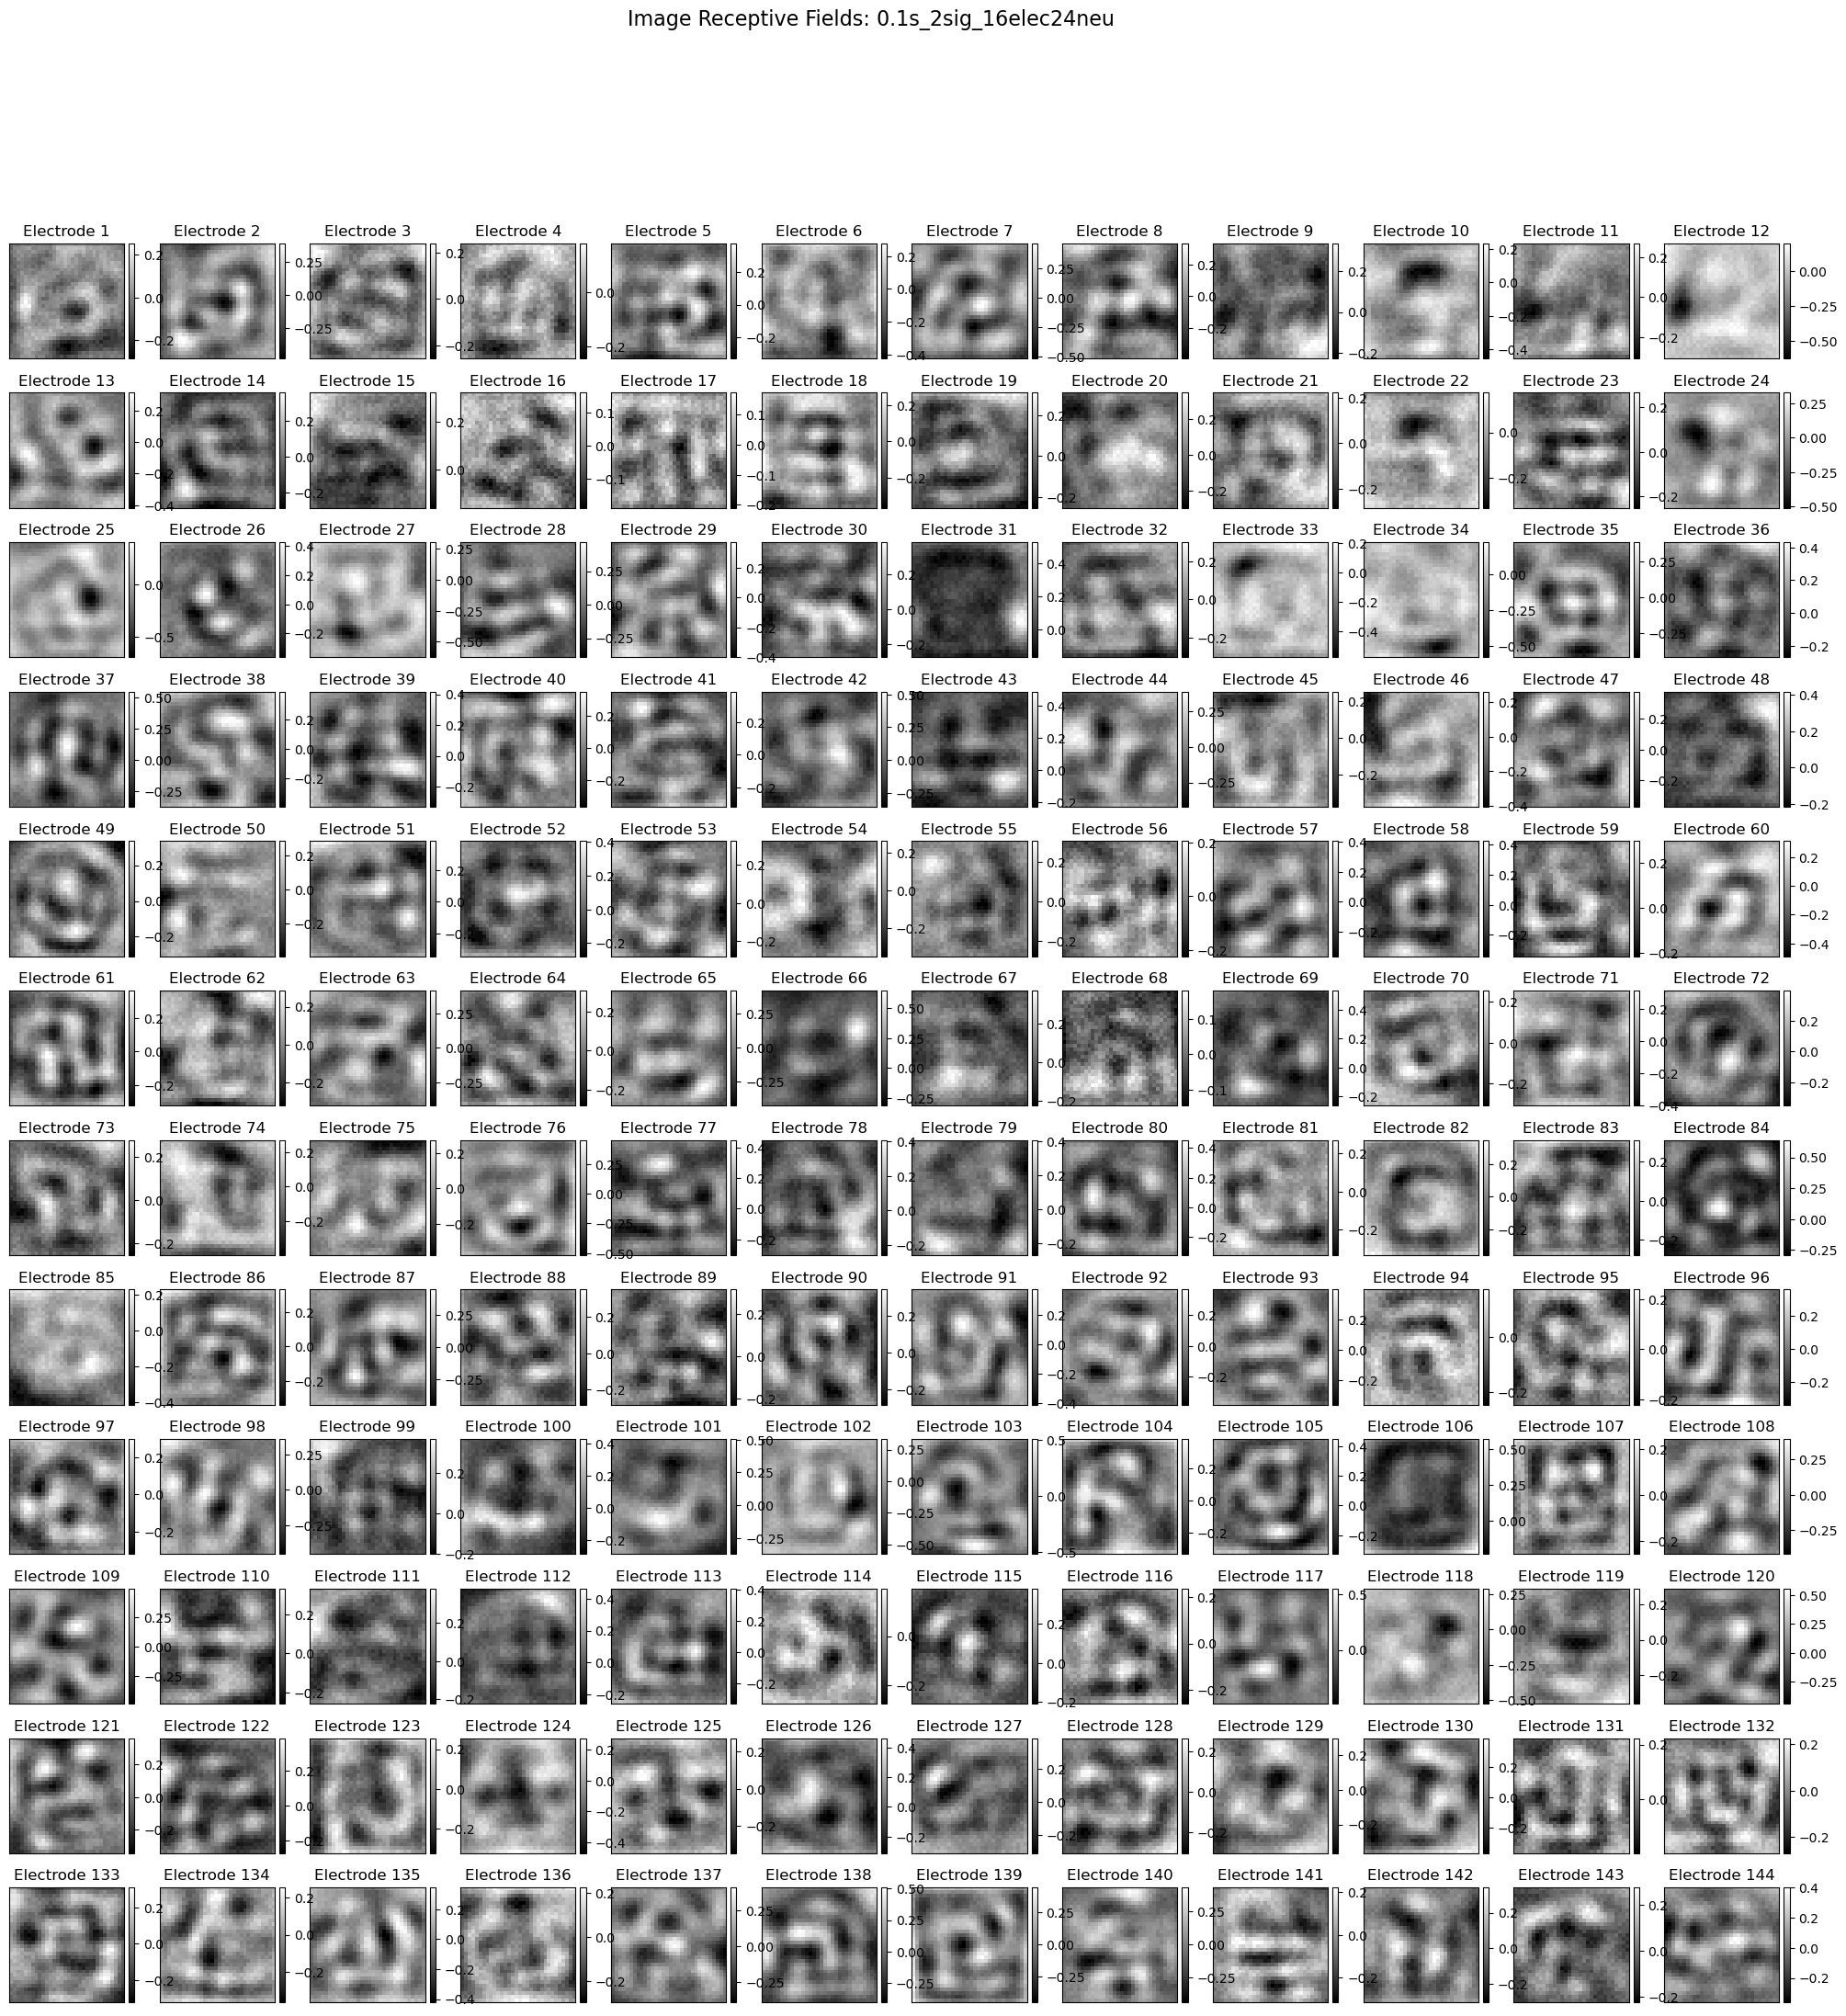

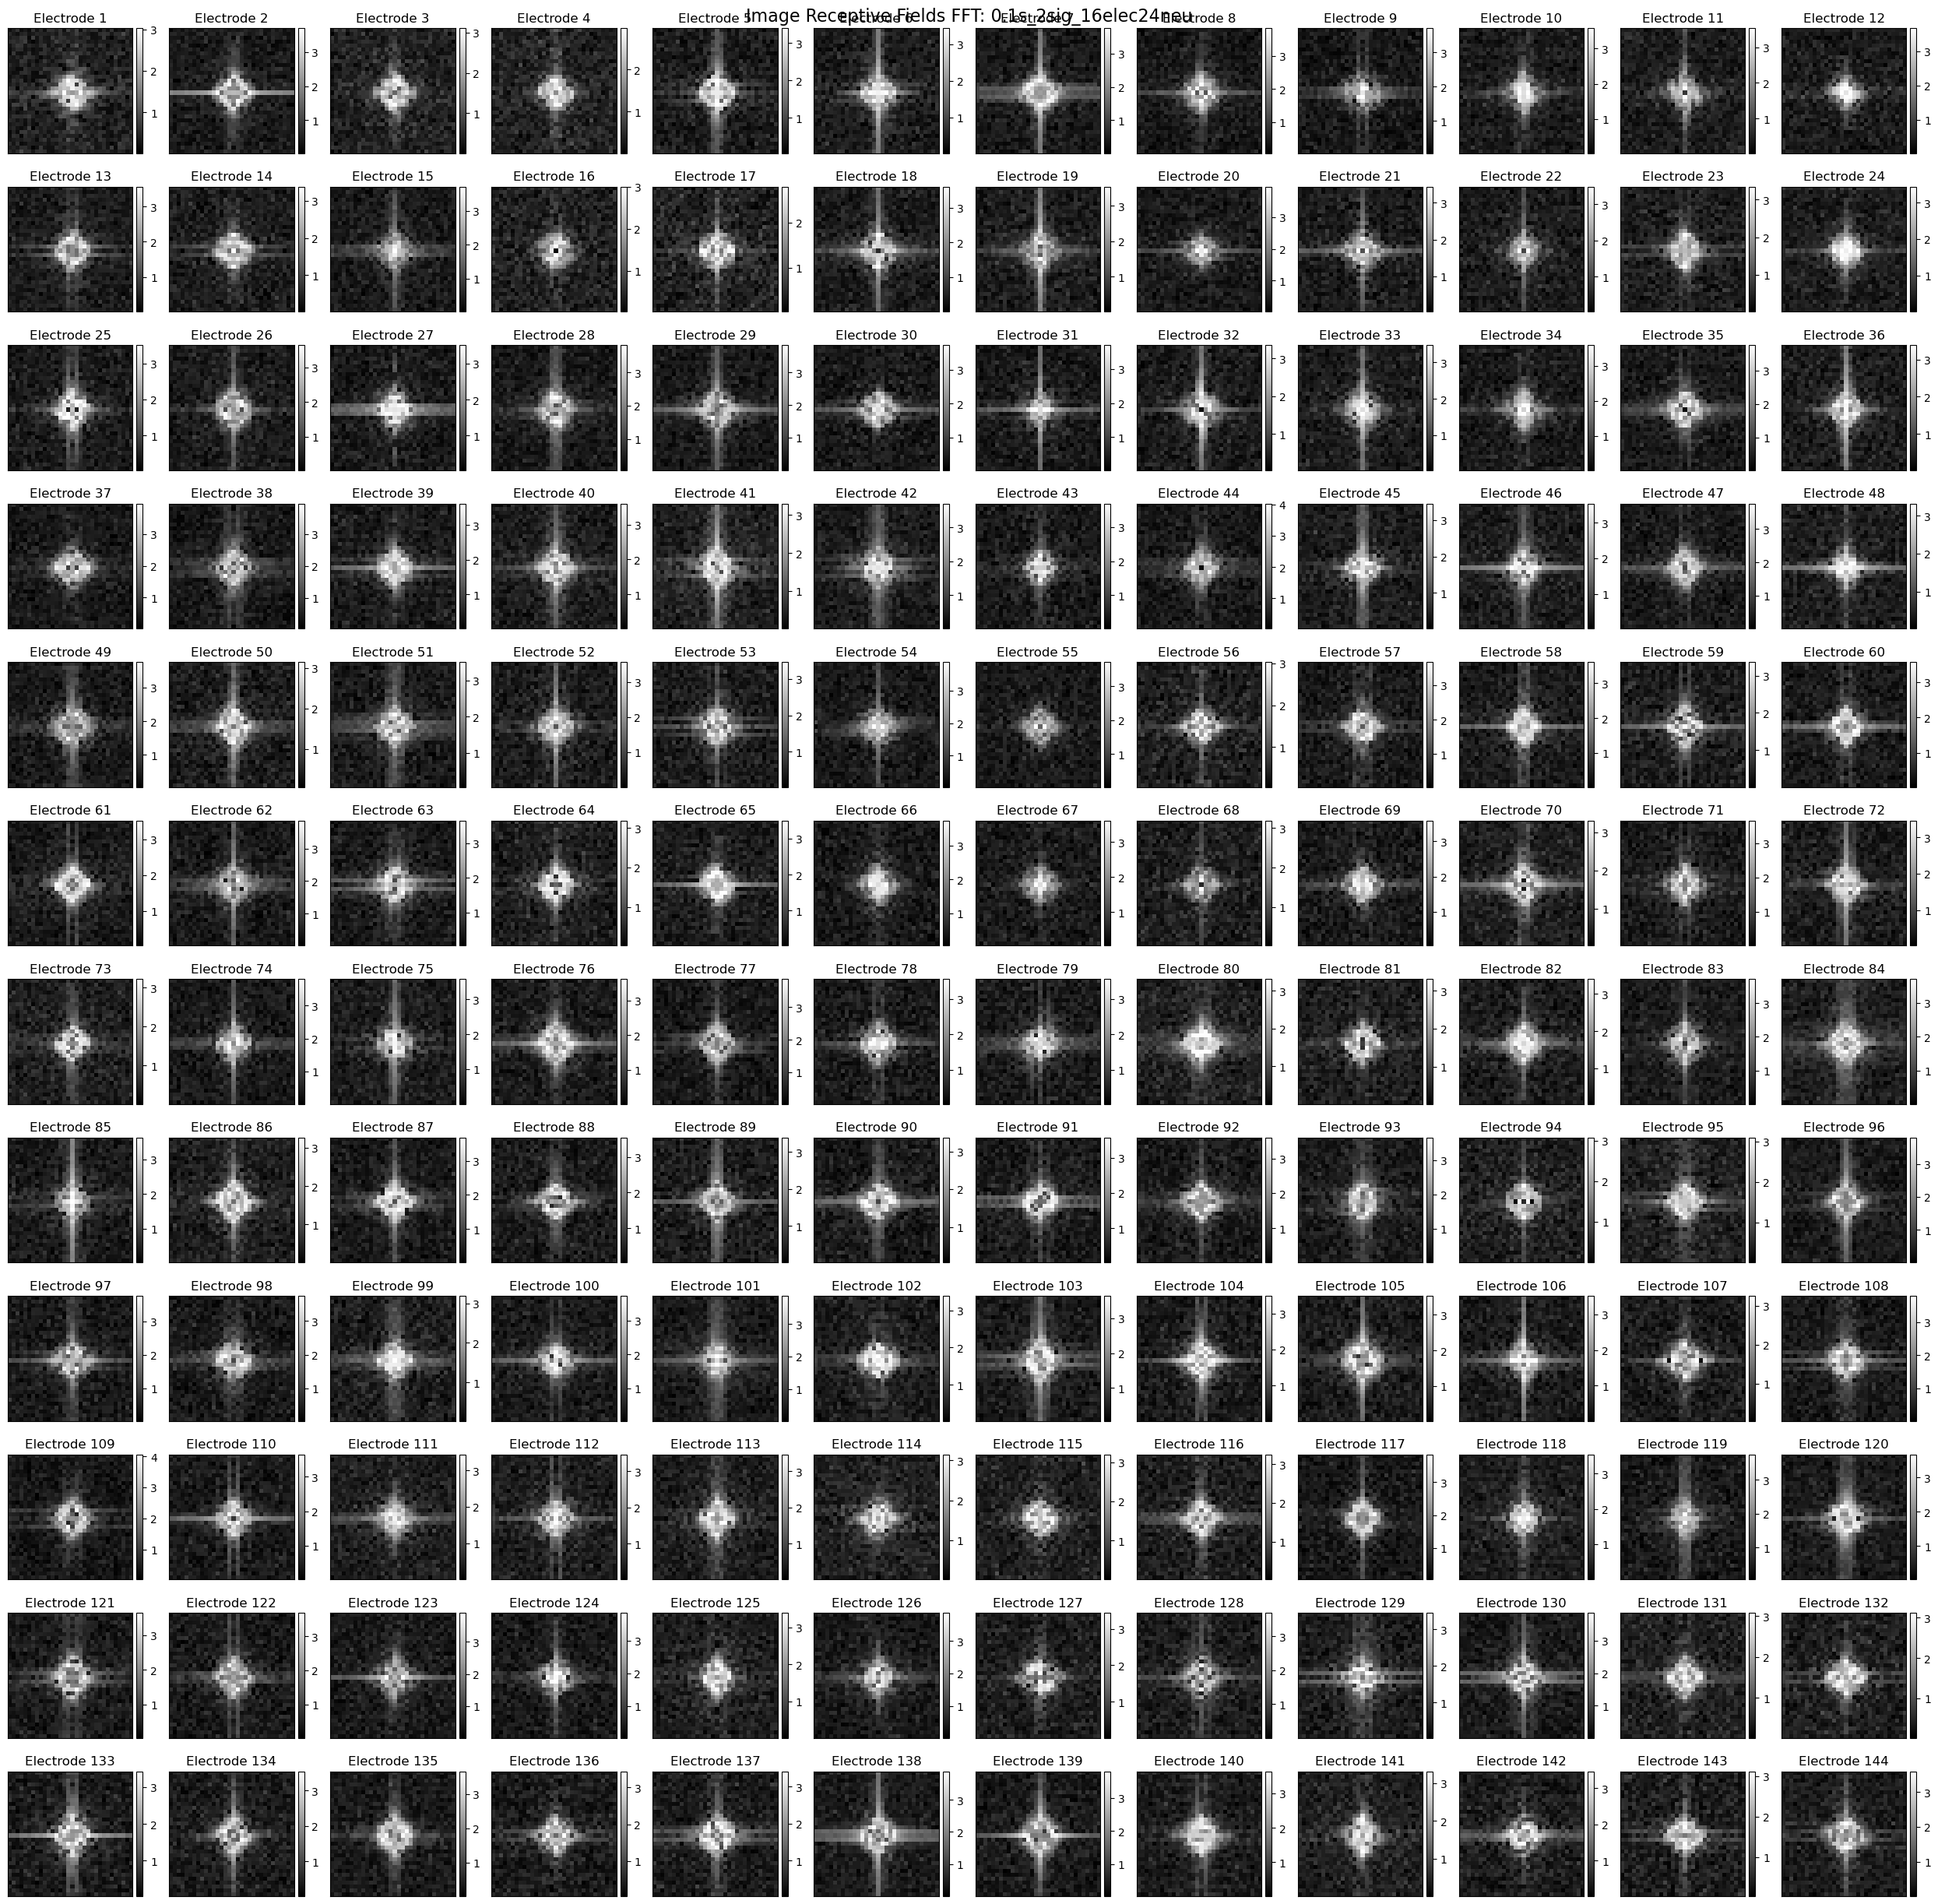

In [10]:
img_side_dim = 32
show_FFT = True
recep_mem = visualize_img_recep(model_path, AutoEncoder, img_side_dim,elec_side_dim,model_title,show_FFT)

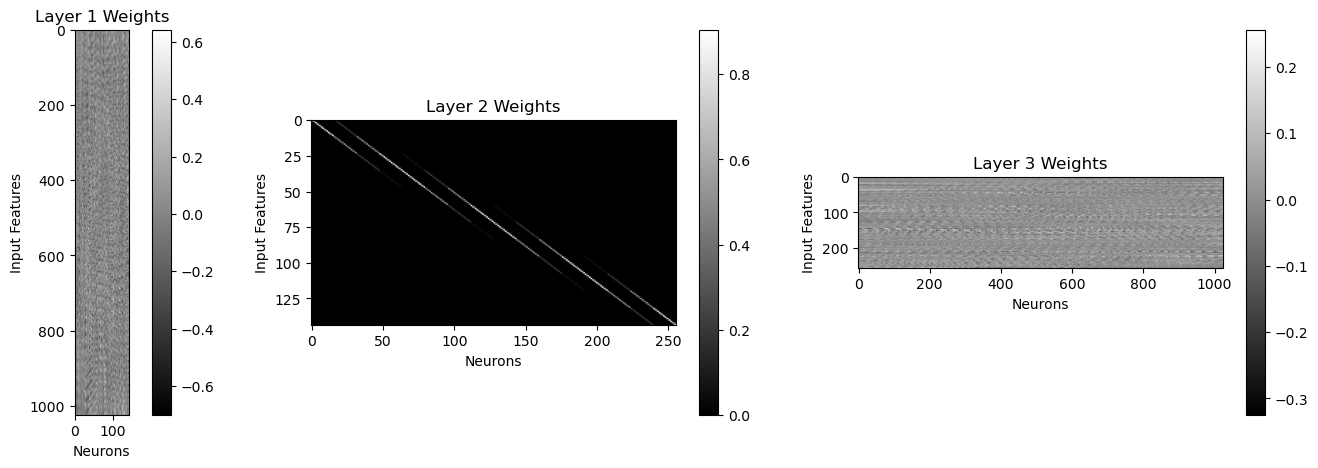

In [11]:
visualize_weights(AutoEncoder,model_path)

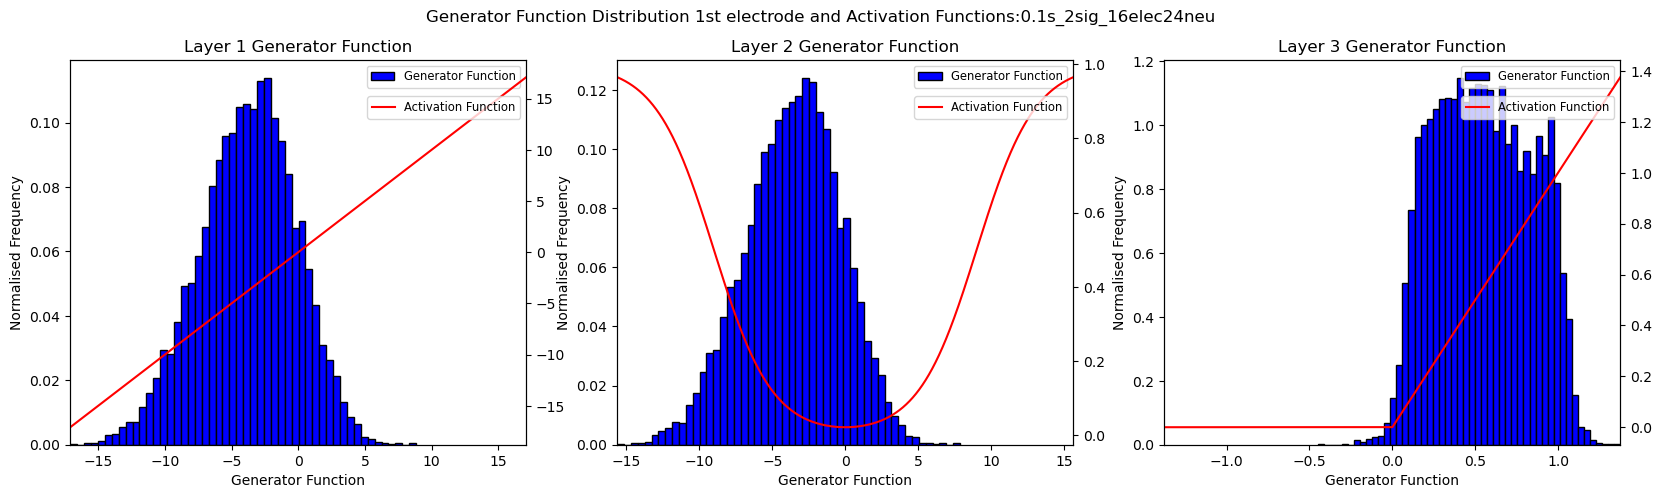

In [12]:
activ_funcs = ["linear","ReLU","ReLU"]
if activ_func2 == "2sig":
    activ_funcs = ["linear","2sig","ReLU"]
else:
    activ_funcs = ["linear","ReLU","ReLU"]

show_generator(model_path,AutoEncoder, activ_funcs, magnitude, shift,model_title)